In [1]:
import json
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
scores={}
for i in glob('*/scores.json'):
    print(os.path.dirname(i))
    with open(i,'r') as f:
        scores[os.path.dirname(i)]=json.load(f)

16_0.3
5
16_0.1
ALL
16_0.5
16_0.7
16_0.8


In [3]:
dfmelt=[]
for k,v in scores.items():
    df=pd.DataFrame.from_dict(v).loc[['R2_train','R2_test']].rename(index={'R2_train':'Train','R2_test':'Test'})
    df.columns=[df.columns,[k]*len(df.columns)]
    dfmelt.append(df.melt(value_vars=df.columns.tolist(),ignore_index=False))
dfmelt=pd.concat(dfmelt).reset_index().rename(columns={'index':'Data','variable_0':'Model','variable_1':'Feature Set','value':"R$^{2}$"})

In [5]:
scores

{'16_0.3': {'ridge': {'MSE_train': [680.1458802901649],
   'R2_train': 0.0820020931227683,
   'MAE_train': 19.252813093217263,
   'MSE_test': 776.1782671056242,
   'R2_test': -0.021362631476476546,
   'MAE_test': 20.983699864163047},
  'lasso': {'MSE_train': [679.6516270632367],
   'R2_train': 0.08266919034549036,
   'MAE_train': 19.286861472701446,
   'MSE_test': 772.3921398226116,
   'R2_test': -0.016380517072136502,
   'MAE_test': 20.93115648773154},
  'elastic': {'MSE_train': [679.4783279734233],
   'R2_train': 0.08290309340411717,
   'MAE_train': 19.302771886151188,
   'MSE_test': 773.5563871632955,
   'R2_test': -0.017912534622698262,
   'MAE_test': 20.953661034116507},
  'knn': {'MSE_train': [2.33645604451387],
   'R2_train': 0.9968464680585004,
   'MAE_train': 0.3175194815938345,
   'MSE_test': 1084.9344824248453,
   'R2_test': -0.4276508180023737,
   'MAE_test': 24.290924801864186},
  'rfr': {'MSE_train': [58.68996346865895],
   'R2_train': 0.9207857237980404,
   'MAE_train': 

In [4]:
{k:np.average([v['R2_train'],v['R2_test']]) for k,v in scores['ALL'].items()}

{'ridge': 0.2665402232159979,
 'lasso': 0.2620534728575863,
 'elastic': 0.2652857528513979,
 'knn': 0.8364869208211365,
 'rfr': 0.8617155462187354,
 'grad': 0.8616745167154256,
 'svr': 0.6743390130685546,
 'krr': 0.8457181071111788,
 'gpr': 0.8374457245877636}

In [5]:
learningcurvedf=pd.concat([dfmelt[dfmelt['Feature Set']==j].replace(j,float(j.split('_')[1])) for j in set([i for i in dfmelt['Feature Set'] if '16' in i])])

/var/folders/px/qyhp9b8j4bb0z5wgydzgkpxw0000gn/T/ipykernel_8348/915395742.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  learningcurvedf=pd.concat([dfmelt[dfmelt['Feature Set']==j].replace(j,float(j.split('_')[1])) for j in set([i for i in dfmelt['Feature Set'] if '16' in i])])


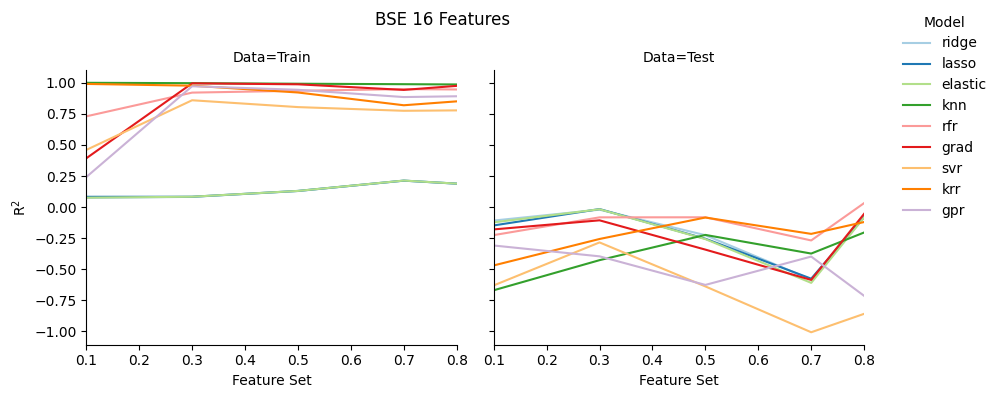

In [6]:


g=sns.relplot(learningcurvedf,
            kind='line',
            x='Feature Set',
            y='R$^{2}$',
            hue='Model',
            col='Data',
            height=4, aspect=1, col_wrap=2,palette=sns.color_palette("Paired",9)
            )
# axes = g.axes.flatten()
# axes[0].axhline(10, ls='--')
# axes[1].axhline(30, ls='--')
# g.set_axis_labels("Training Set Ratio", "R$^{2}$")
g.set_titles("{col_var}={col_name}")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
g.set(xlim=(0.1, 0.8))
g.fig.suptitle(f"BSE 16 Features")
# plt.title(f"{name}")
plt.tight_layout()
plt.savefig(f'BSE_16_learning_curve.png',dpi=300,bbox_inches='tight')
plt.show()

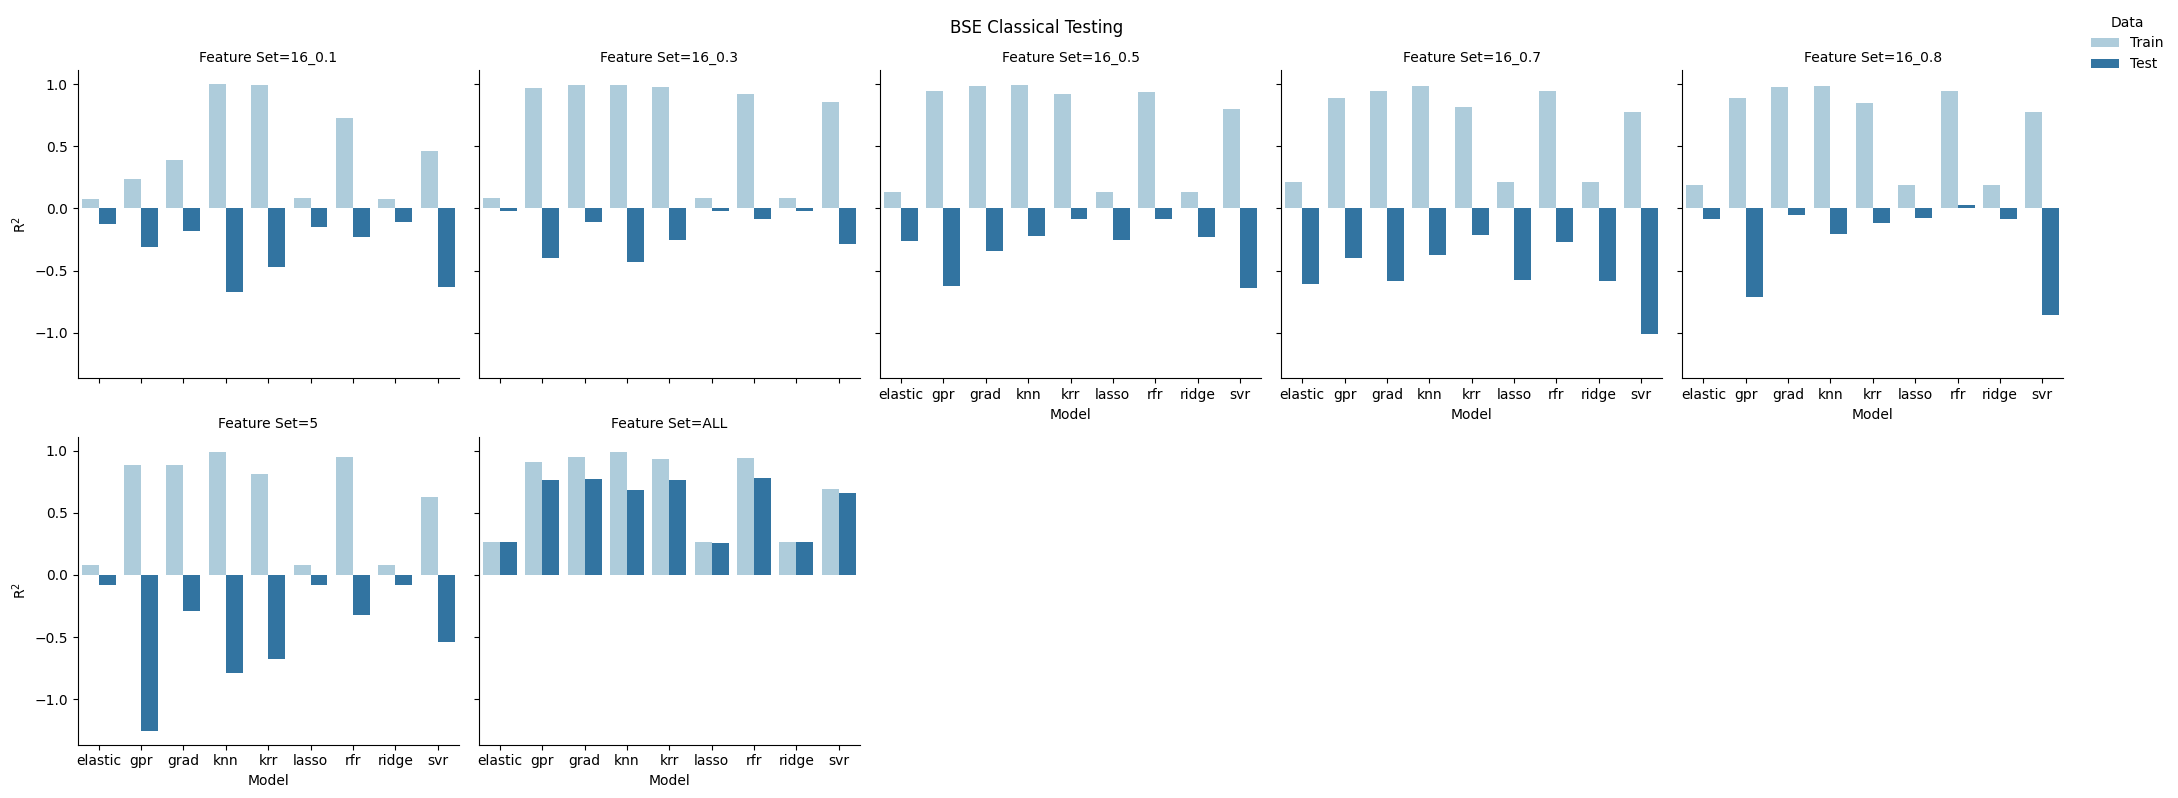

In [7]:
g=sns.catplot(dfmelt.reset_index().sort_values(by=['Feature Set','Model']),
             kind='bar',
             x='Model',
              y='R$^{2}$',
              hue='Data',
              col='Feature Set',
              height=4, aspect=1, col_wrap=5,palette=sns.color_palette("Paired",2)
             )

# g.set_axis_labels("Training Set Ratio", "R$^{2}$")
g.set_titles("{col_var}={col_name}")
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# g.set(ylim=(0, 1))
g.fig.suptitle(f"BSE Classical Testing")
# plt.title(f"{name}")
plt.tight_layout()
plt.savefig(f'BSE.png',dpi=300,bbox_inches='tight')
plt.show()